In [3]:
import pandas as pd

#The Problem of Scale

The data used for modeling usually contains features of various dimensions and 

1.   List item
2.   List item

scales altogether. Different scales of the data features affect the modeling of a dataset adversely.

It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling.


This is when standardization comes into picture.

Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:

    mean –> 0 (zero)
    standard deviation –> 1

![Formula](https://www.journaldev.com/wp-content/uploads/2020/10/Standardization.png.webp)    



In [14]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 21.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.60-py2.py3-none-any.whl size=23819 sha256=fc3082f06ec08efef6f2331d10ad2c737577f8299d35e62165d96475aa6497a2
  Stored in directory: /root/.cache/pip/wheels/f0/be/a4/846f02c5985562250917b0ab7b33fff737c8e6e8cd5209aa3b
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [22]:
import yfinance as yf

# berkshire hathaway inc. (b stock)
brk = yf.Ticker('GOGL')

hist = brk.history(period="5Y", auto_adjust=True)

hist[['Volume','Open']]

,Volume,Open
Date,,
2016-07-05,25980,2.975678
2016-07-06,51120,2.889426
2016-07-07,14420,2.846301
2016-07-08,18740,2.803175
2016-07-11,30740,2.889426
...,...,...
2021-06-28,1229400,11.150000
2021-06-29,560600,10.870000
2021-06-30,1499600,10.940000


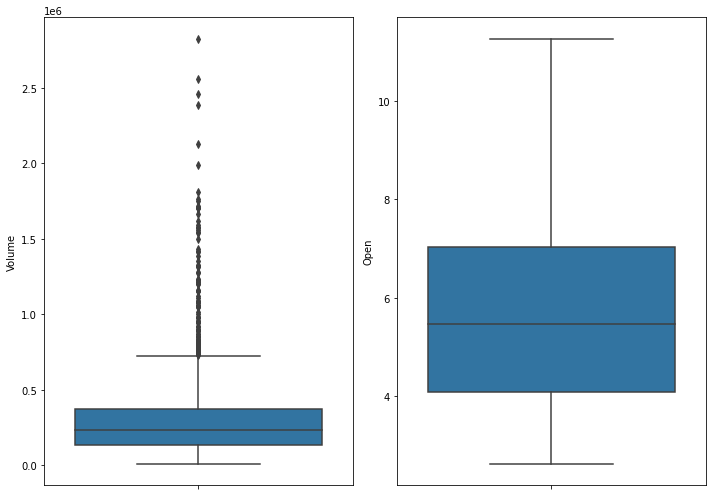

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2,figsize=(10,7))
sns.boxplot(y='Volume',data=hist,ax=axes[0])
sns.boxplot(y='Open',data=hist,ax=axes[1])
plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

X=hist[['Volume','Open']]

scaler = StandardScaler()
standard_df = scaler.fit_transform(X)
standard_df = pd.DataFrame(standard_df, columns =['Open', 'Volume'])
standard_df

,Open,Volume
0,-0.932639,-1.493713
1,-0.852942,-1.542068
2,-0.969285,-1.566246
3,-0.955590,-1.590424
4,-0.917549,-1.542069
...,...,...
1254,2.882350,3.089066
1255,0.762172,2.932090
1256,3.738917,2.971334
1257,2.023564,2.965728


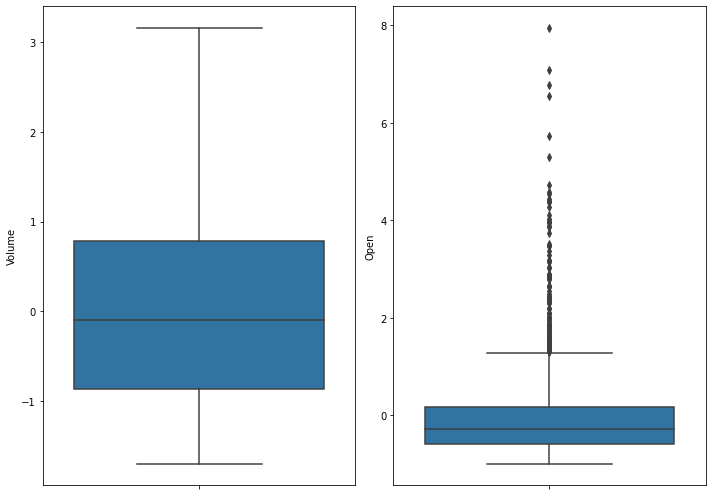

In [32]:
fig,axes = plt.subplots(1,2,figsize=(10,7))
sns.boxplot(y='Volume',data=standard_df,ax=axes[0])
sns.boxplot(y='Open',data=standard_df,ax=axes[1])
plt.tight_layout()
plt.show()

# Precision & Recall
Metrics for imbalanced classification

In [8]:
data = {
    
    'Actual': ["Credit","Debit","Credit","Credit","Debit","Debit","Debit","Credit","Credit","Credit","Debit","Debit"],
    'Predicted':["Debit","Debit","Credit","Debit","Debit","Debit","Credit","Credit","Debit","Credit","Credit","Debit"]
    
}

df = pd.DataFrame(data)
df

,Actual,Predicted
0,Credit,Debit
1,Debit,Debit
2,Credit,Credit
3,Credit,Debit
4,Debit,Debit
5,Debit,Debit
6,Debit,Credit
7,Credit,Credit
8,Credit,Debit
9,Credit,Credit


In [9]:
values_df = df.replace({'Credit':0,'Debit':1})
values_df

,Actual,Predicted
0,0,1
1,1,1
2,0,0
3,0,1
4,1,1
5,1,1
6,1,0
7,0,0
8,0,1
9,0,0


# Precision

Precision attempts to answer the following question:

  #### What proportion of positive identifications was actually correct?

Precision is defined as follows:
![](https://miro.medium.com/max/1104/1*5PvyyMvH5n42XICQrlXOzw.png)

# Recall

Recall attempts to answer the following question:

 ### What proportion of actual positives was identified correctly?

Mathematically, recall is defined as follows:
![](https://miro.medium.com/max/1044/1*I0Yd-o2yQsHBRKFbf0rjpQ.png)


In [10]:
from sklearn.metrics import precision_score,recall_score

print(   precision_score(values_df['Predicted'],values_df['Actual'] )  )

0.6666666666666666


In [12]:
print(   recall_score(values_df['Predicted'],values_df['Actual'] )  )

0.5714285714285714
